**NLP - HW4 - Q5 // Matin Mahmoodkhani - 99522095**

Part A

In [2]:
pip install yfinance

In [27]:
# Importing Neccesary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

Part B

In [7]:
# First We download the train data and show them. there are 1826 lines of data which show us the count of days
data_train = yf.download("BTC-USD", start="2019-01-01", end="2024-01-01")
data_train

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [8]:
# Then we get the test data
data_test = yf.download("BTC-USD", start="2024-01-01")
data_test

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
...,...,...,...,...,...,...
2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,60636.855469,37840840057
2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,58254.011719,48439780271
2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,59123.433594,32711813559


Part C

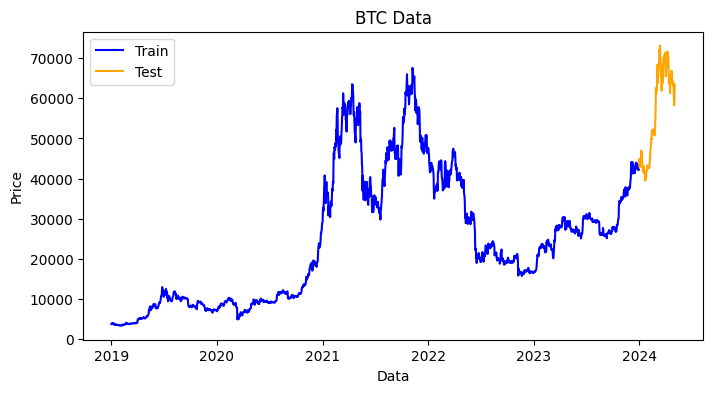

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(data_train.index, data_train['Close'], label='Train', color='blue')
plt.plot(data_test.index, data_test['Close'], label='Test', color='orange')
plt.title('BTC Data')
plt.xlabel('Data')
plt.ylabel('Price')
plt.legend()
plt.show()


Part D

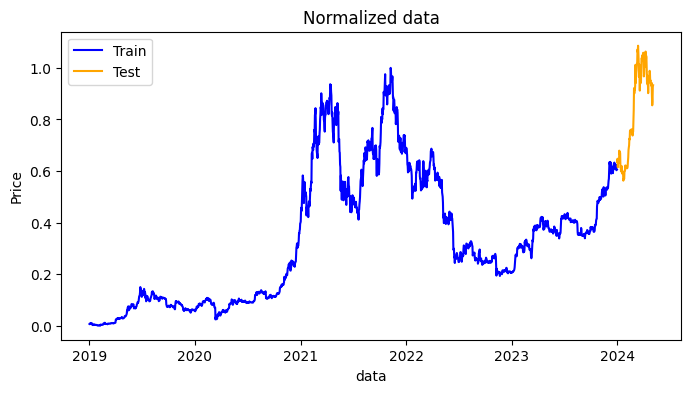

In [19]:
scaler = MinMaxScaler()
# Scaling the train data
scaled_train_data = scaler.fit_transform(data_train[['Close']].values.reshape(-1, 1))

# Scaling the test data based on the train data
scaled_test_data = scaler.transform(data_test[['Close']].values.reshape(-1, 1))

plt.figure(figsize=(8, 4))
plt.plot(data_train.index, scaled_train_data, label='Train', color='blue')
plt.plot(data_test.index, scaled_test_data, label='Test', color='orange')
plt.title('Normalized data')
plt.xlabel('data')
plt.ylabel('Price')
plt.legend()
plt.show()

Part E

In [22]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# number of steps to consider for predicting
time_steps = 60

# calling the function to prepare the data
X_train, y_train = create_dataset(scaled_train_data, time_steps)
X_test, y_test = create_dataset(scaled_test_data, time_steps)

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)


X_train.shape: (1766, 60)
y_train.shape: (1766,)


Part F

In [24]:
# Creating the sequential model
model = Sequential()

# Based on the image, we need to add a LSTM with 50 units and dropout 0.2
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# There are 2 more LSTMs with return_sequences and dropout that we should add to the model
for i in range(2):
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

# Finally the last LSTM that its return sequence is false and doesn't have dropout
model.add(LSTM(units=50))

# Output layer with just one unit
model.add(Dense(units=1))

Part G

In [25]:
# Then, we compile the model using loss and optimizer that was mentioned
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

Part H

3/3 [==============================] - 2s 38ms/step


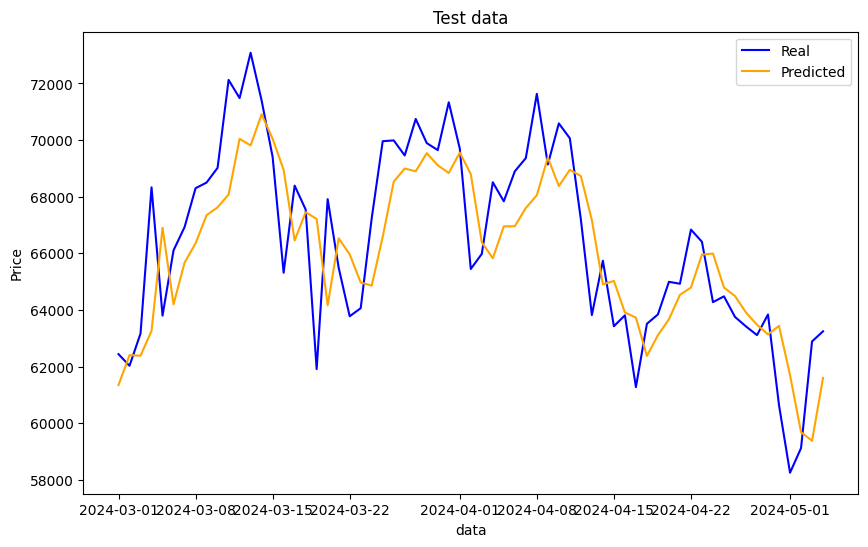

In [26]:
# Prediction
predicted_values = model.predict(X_test)

# make the data back to its real values before normalization
predicted_values = scaler.inverse_transform(predicted_values)

# Ploting the result
plt.figure(figsize=(10, 6))
plt.plot(data_test.index[time_steps:], data_test['Close'][time_steps:], label='Real', color='blue')
plt.plot(data_test.index[time_steps:], predicted_values, label='Predicted', color='orange')
plt.title('Test data')
plt.xlabel('data')
plt.ylabel('Price')
plt.legend()
plt.show()


As we can see, model has work properly and predicted values are near to real ones

Part I

Increasing or decreasing the number of past data to predict specific data in the stage of data preparation based on the desired model and problem has certain advantages and disadvantages. Next, I will examine these advantages and disadvantages:

**Advantages:**


*   Increasing model accuracy: Increasing the amount of past data can allow the model to identify more complex patterns in the data and use these patterns to make better predictions.
*   Reducing model complexity: Increasing the amount of past data may make the model simpler because the model needs fewer features or more complex layers to learn important patterns.
*   Reduction of time difference: By increasing the number of past data, the model can identify more complex time patterns and use these patterns to make more accurate predictions.

**Disadvantages:**


*   Increased computational complexity: Increasing the number of past data may increase the computational complexity of the model, because the model must work with more data and perform more complex calculations.
*   Larger error in temporal prediction: As the number of past data increases, we may have larger errors in the temporal prediction of the model, because the model may consider more past data and less new information.
*   Increased memory requirement: Increasing the number of past data may increase the memory required to store the data and train the model.
